In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [ ]:
def p1_q1a(url, column_names = None, skipRows=None): # defining a function with name p1_qla
  df = pd.read_csv(url,names=column_names,skiprows=skipRows,delim_whitespace=True)#Reading the csv file from given url
  print("Number of Rows :",df.shape[0])# Displaying no of rows in dataframe using shape attribute of the dataframe
  print("Number of Columns:",df.shape[1])# Displayinng no of columns in dataframe using shape attribute of the dataframe
  for column in df.columns:
    print(column,"is of the data type: ",df[column].dtypes) # displaying data type of column using dtypes
  return df

url = "https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Complete_TAVG_daily.txt"
column_names = ['Date_Number', 'Year', 'Month', 'Day', 'Day_of_Year', 'Anomaly']
climate = p1_q1a(url, column_names, skipRows=23)
climate

Number of Rows : 52077
Number of Columns: 6
Date_Number is of the data type:  float64
Year is of the data type:  int64
Month is of the data type:  int64
Day is of the data type:  int64
Day_of_Year is of the data type:  int64
Anomaly is of the data type:  float64


,Date_Number,Year,Month,Day,Day_of_Year,Anomaly
0,1880.001,1880,1,1,1,-0.692
1,1880.004,1880,1,2,2,-0.592
2,1880.007,1880,1,3,3,-0.673
3,1880.010,1880,1,4,4,-0.615
4,1880.012,1880,1,5,5,-0.681
...,...,...,...,...,...,...
52072,2022.568,2022,7,27,208,1.639
52073,2022.571,2022,7,28,209,1.631
52074,2022.574,2022,7,29,210,1.574
52075,2022.577,2022,7,30,211,1.577


In [ ]:
climate.shape[0] == 51865

False

In [ ]:
climate.shape[1] == 6

True

In [ ]:
sum(climate.dtypes == ['float64', 'int64', 'int64', 'int64', 'int64', 'float64']) == 6

True

In [ ]:
climate.iloc[0,0]==1880.001 and climate.iloc[0,5]==-0.534

False

In [ ]:
climate['Temp'] = climate['Anomaly']+8.59 # Adding Temp column to dataframe

climate['Temp'].mean() # finding mean of temp column

8.688502563511724

In [ ]:
climate.shape[1] == 7

True

In [ ]:
np.isclose(climate['Temp'].mean(), 8.6953882)

False

In [ ]:
mean_anomaly_year = climate.groupby('Year')['Anomaly'].mean()# Grouping by year and caluculating Anomaly mean for each year
#years = pd.Int64Index(mean_anomaly_year.keys())
#years = pd.Int64Index(mean_anomaly_year)  # Creating Int64Index directly from the array
years = mean_anomaly_year.index.astype('int64')#Getting the index of year
print(years)
mean_anomaly_year=mean_anomaly_year.values




Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64', name='Year', length=143)


In [ ]:
print('Years index:\n', years[0:5]) # displaying first 5 Int64index
print('Means array:\n', mean_anomaly_year[0:5]) # displaying mean array

Years index:
 Int64Index([1880, 1881, 1882, 1883, 1884], dtype='int64', name='Year')
Means array:
 [-0.59444262 -0.33462192 -0.47347123 -0.59485479 -0.78812022]


In [ ]:
len(years) == len(mean_anomaly_year)

True

In [ ]:
min(years) == 1880

True

In [ ]:
max(years) == 2021

False

In [ ]:
np.isclose(mean_anomaly_year[0], -0.537912)

False

In [ ]:
np.isclose(mean_anomaly_year[1], -0.295863)

False

In [ ]:
np.isclose(mean_anomaly_year.mean(), 0.10543307)

False

In [ ]:
type(years) is pd.core.indexes.numeric.Int64Index

True

In [ ]:
mean_temp_year = climate.groupby('Year')['Temp'].mean().values # caluculating mean of temperature for each year
print(mean_temp_year[0:5]) # displaying result

[7.99555738 8.25537808 8.11652877 7.99514521 7.80187978]


In [ ]:
len(years) == len(mean_temp_year)

True

In [ ]:
np.isclose(mean_temp_year[0], 8.05208743)

False

In [ ]:
np.isclose(mean_temp_year[1], 8.29413699)

False

In [ ]:
np.isclose(mean_temp_year.mean(), 8.6954330)

False

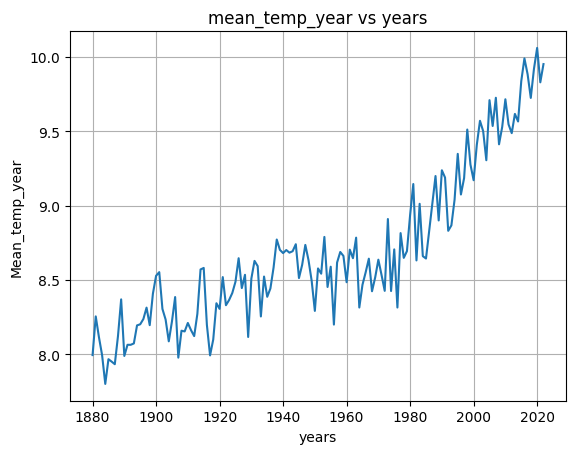

In [ ]:
plt.figure()
plt.plot(years, mean_temp_year)# plotting year vs mean_temp_year
plt.title('mean_temp_year vs years')# adding title
plt.xlabel('years')# adding xlabel as year
plt.ylabel('Mean_temp_year')# adding ylabel as Mean_temp_year
plt.grid(True)
plt.show()


In [ ]:
mean_anomaly_month = climate.groupby('Month')['Anomaly'].mean() # caluculating mean of anomaly month
months = mean_anomaly_month.index.astype('int64')
mean_anomaly_month=mean_anomaly_month.values
print(months)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')


In [ ]:
print('Months index:\n', months[0:5])
print('Means array:\n', mean_anomaly_month[0:5])

Months index:
 Int64Index([1, 2, 3, 4, 5], dtype='int64', name='Month')
Means array:
 [0.01616693 0.03280391 0.14885924 0.31274965 0.17484615]


In [ ]:
len(months) == len(mean_anomaly_month)

True

In [ ]:
np.isclose(mean_anomaly_month[0], -0.027709)

False

In [ ]:
np.isclose(mean_anomaly_month[1], 0.0090812)



False

In [ ]:
np.isclose(mean_anomaly_month.mean(), 0.104825)

False

In [ ]:
type(months) is pd.core.indexes.numeric.Int64Index

True

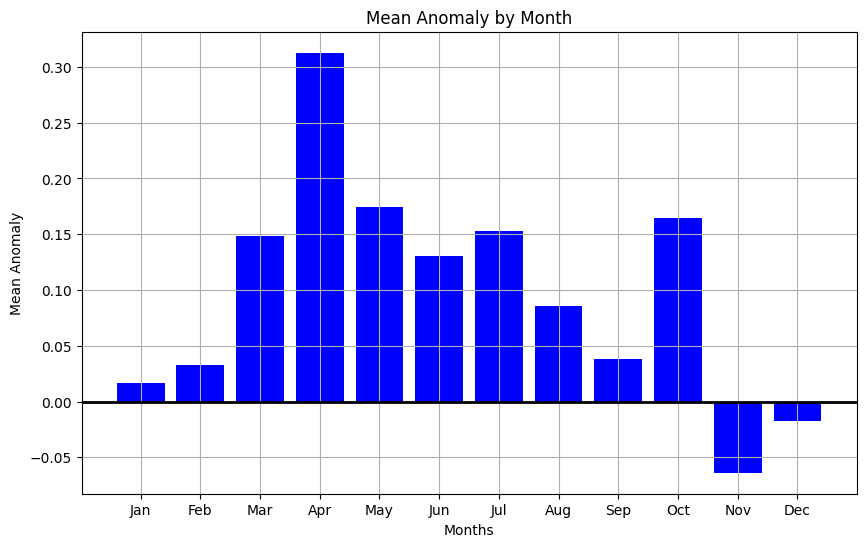

In [ ]:
abbreviation_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # creating abbrivated month list
plt.figure(figsize=(10, 6)) # giving size of figure
plt.bar(range(1,13), mean_anomaly_month, color='blue') # plotting month vs mean_anomaly_month
plt.title('Mean Anomaly by Month')
plt.xlabel('Months')
plt.ylabel('Mean Anomaly')
plt.xticks(range(1,13), abbreviation_months)  # Setting xticks with abbreviation months
plt.axhline(0, color='black', linewidth=2)  # Adding black horizontal line at 0 mean anomaly on the plot
plt.grid()
plt.show()


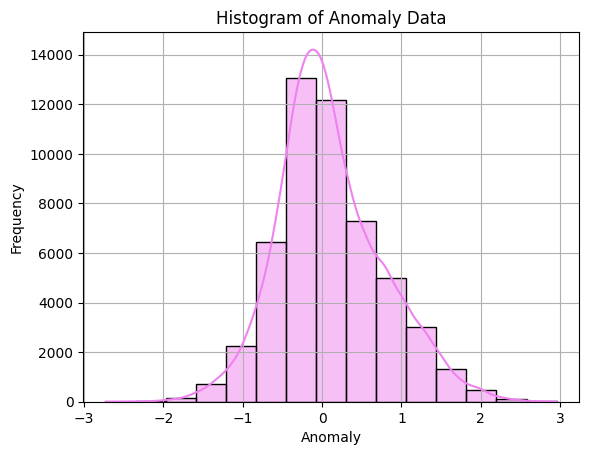

In [ ]:
sns.histplot(climate['Anomaly'], bins=15, kde=True, color='violet', edgecolor='black')
plt.title('Histogram of Anomaly Data')#Adding title
plt.xlabel('Anomaly')#Adding x label
plt.ylabel('Frequency')#adding y label
plt.grid()
plt.show() #displaying plot

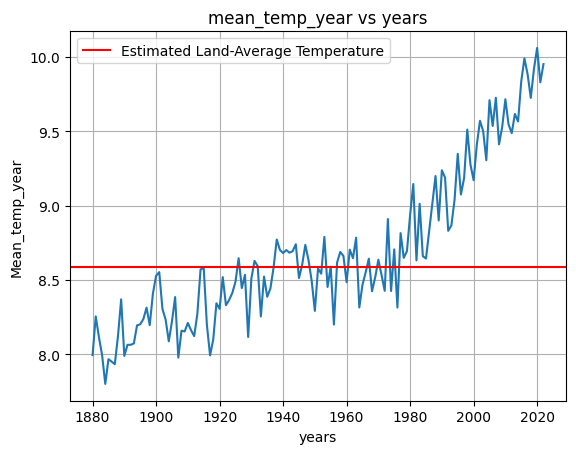

In [ ]:
plt.figure()
plt.plot(years, mean_temp_year)# plotting year vs mean_temp_year
land_average_temp =8.59
plt.axhline(y=land_average_temp, color='red', linestyle='-', label='Estimated Land-Average Temperature')# Addimg horizontal line at estimated avg temp
plt.title('mean_temp_year vs years')# adding title
plt.xlabel('years')
plt.ylabel('Mean_temp_year')
plt.grid(True)
plt.legend()
plt.show()


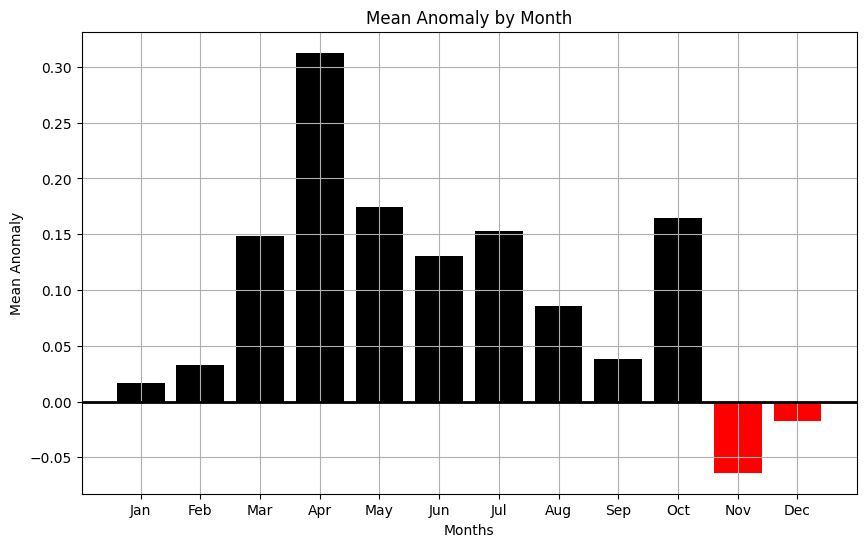

In [ ]:
abbreviation_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # creating abbrivated month list
plt.figure(figsize=(10, 6)) # giving size of figure
colors = ['black' if anomaly >= 0 else 'red' for anomaly in mean_anomaly_month] # condition to give black for +ve and red for -ve
plt.bar(range(1,13), mean_anomaly_month, color=colors) # plotting month vs mean_anomaly_month
plt.title('Mean Anomaly by Month')
plt.xlabel('Months')
plt.ylabel('Mean Anomaly')
plt.xticks(range(1,13), abbreviation_months)  # Setting xticks with abbreviation months
plt.axhline(0, color='black', linewidth=2)  # Adding black horizontal line at 0 mean anomaly on the plot
plt.grid()
plt.show()